<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/Explore-ML-Materials/blob/master/Notebooks/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install modules
#!pip install numpy pandas matplotlib seaborn sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Datasets

In [3]:
dataset=pd.read_csv('https://raw.githubusercontent.com/AnirbanMukherjeeXD/Explore-ML-Materials/master/datasets/Product-Purchase-Data.csv')
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


### Extract Input and Output columns

In [10]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

# Missing Data

### Identify

In [11]:
dataset.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [12]:
dataset.isnull().any()

Country      False
Age           True
Salary        True
Purchased    False
dtype: bool

### Impute

In [13]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [14]:
#Before
X.iloc[4,:]

Country    Germany
Age             40
Salary         NaN
Name: 4, dtype: object

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
imputer = imputer.fit(X.iloc[:, 1:3])
X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])

In [16]:
#After 
X.iloc[4,:]

Country    Germany
Age             40
Salary     63777.8
Name: 4, dtype: object

# Outliers

[Read about Boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

In [218]:
X_extra=pd.DataFrame([['France',100,65000],['Germany',-20,67000],['Spain',47,650000]],columns=X.keys())
X_out=X.append(X_extra)

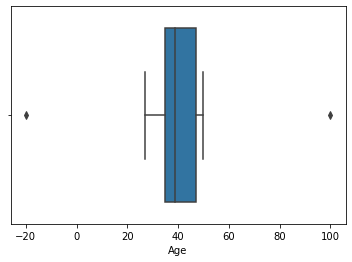

In [219]:
sns.boxplot(X_out[X.keys()[1]])

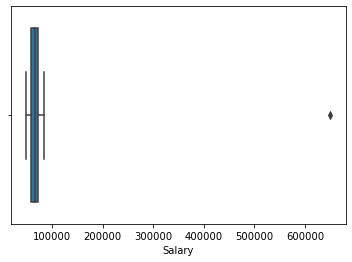

In [220]:
sns.boxplot(X_out[X.keys()[2]])

# Categorical Data

## Label Encoding

In [221]:
X.head()

,Country,Age,Salary
0,France,44.0,72000.000000
1,Spain,27.0,48000.000000
2,Germany,30.0,54000.000000
3,Spain,38.0,61000.000000
4,Germany,40.0,63777.777778


In [222]:
from sklearn.preprocessing import LabelEncoder

# Encoding the Independent Variable
labelencoder_X = LabelEncoder()
X.iloc[:, 0] = labelencoder_X.fit_transform(X.iloc[:, 0])

# Encoding the Dependent Variable
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [223]:
X.head()

,Country,Age,Salary
0,0,44.0,72000.000000
1,2,27.0,48000.000000
2,1,30.0,54000.000000
3,2,38.0,61000.000000
4,1,40.0,63777.777778


In [224]:
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## One-hot Encoding

In [225]:
X['Country']

0    0
1    2
2    1
3    2
4    1
5    0
6    2
7    0
8    1
9    0
Name: Country, dtype: int32

In [226]:
one_hot = pd.get_dummies(X['Country'])
X=X.drop('Country',axis=1)
X=X.join(one_hot)

##To include: Dummy Variable Trap

In [227]:
X.head()

,Age,Salary,0,1,2
0,44.0,72000.000000,1,0,0
1,27.0,48000.000000,0,0,1
2,30.0,54000.000000,0,1,0
3,38.0,61000.000000,0,0,1
4,40.0,63777.777778,0,1,0


# Feature Scaling

In [228]:
X=X.values
type(X)

numpy.ndarray

In [229]:
print(np.mean(X,axis=0))
print(np.std(X,axis=0))

[   38.777777778 63777.777777778     0.4             0.3
     0.3        ]
[    6.881537296 10970.667963053     0.489897949     0.458257569
     0.458257569]


## Standardizing

$$z = {x-\mu \over \sigma}.$$


In [192]:
#Without sklearn
#only first two columns
for i in range(2):
    X[:,i]=(X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])

In [230]:
#Using sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#scaler_Y = StandardScaler()
#y_train = scaler_Y.fit_transform(y_train)

In [231]:
print(np.mean(X,axis=0))
print(np.std(X,axis=0))

[-0.  0. -0. -0. -0.]
[1. 1. 1. 1. 1.]
